In [21]:
pip install mlxtend


     ---------------------------------------- 1.4/1.4 MB 8.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df = pd.read_csv("grocery_data.csv")
df.head()

,BillNo,Itemname,Quantity,CustomerID,Price
0,1043,NESTLÉ MUNCH,6,26745,12.50
1,1798,NESTLÉ MUNCH,1,52792,12.50
2,1960,NESTLÉ MILKMAID,4,47187,150.45
3,1704,NESTLÉ MUNCH,9,52336,12.50
4,1901,NESTLÉ EVERYDAY Ghee,7,13746,495.00


In [6]:
df.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
CustomerID    0
Price         0
dtype: int64

In [7]:
df.describe()

,BillNo,Quantity,CustomerID,Price
count,500.000000,500.000000,500.00000,500.000000
mean,1515.016000,4.942000,35940.57400,377.581980
std,294.211401,2.568234,14071.61977,372.637062
min,1000.000000,1.000000,10061.00000,12.500000
25%,1256.500000,3.000000,24152.75000,55.000000
50%,1512.000000,5.000000,35695.50000,150.450000
75%,1787.000000,7.000000,47932.00000,750.250000
max,2000.000000,9.000000,59753.00000,999.990000


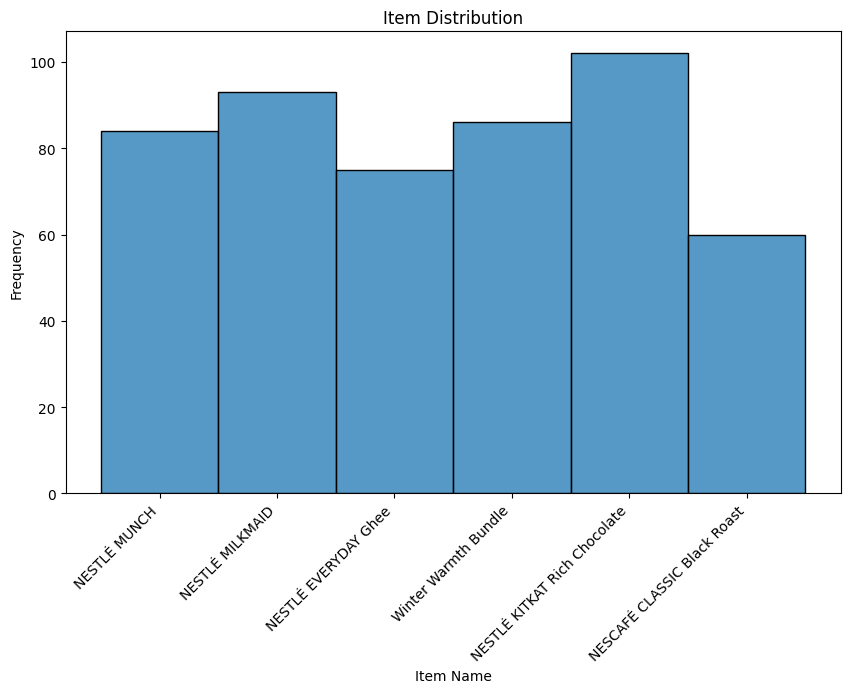

In [10]:
# Seaborn histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Itemname', bins=len(item_prices), kde=False)
plt.title('Item Distribution')
plt.xlabel('Item Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

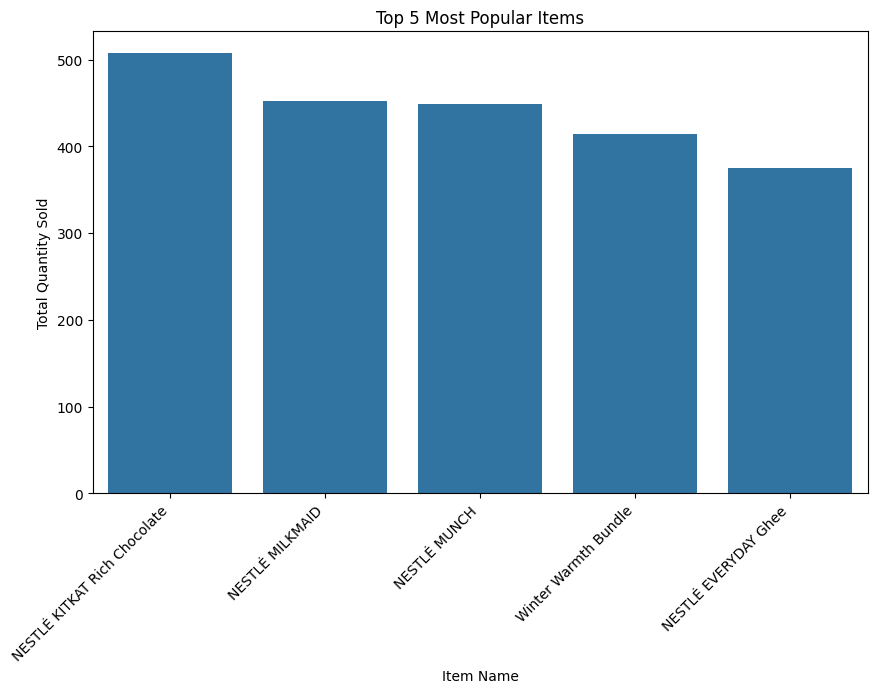

In [12]:
# Calculate item popularity
item_popularity = df.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)

# Select the top N items
top_n = 5
top_items = item_popularity.head(top_n)

# Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.index, y=top_items.values)
plt.title(f'Top {top_n} Most Popular Items')
plt.xlabel('Item Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


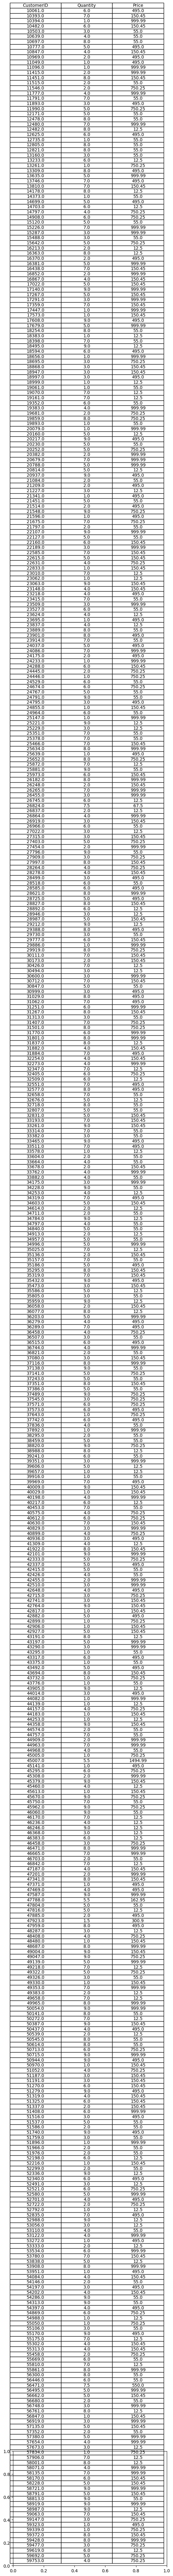

In [19]:
# Calculate average quantity and spending per customer
customer_behavior = df.groupby('CustomerID').agg({'Quantity': 'mean', 'Price': 'sum'}).reset_index()

# Create a table
table_data = customer_behavior[['CustomerID', 'Quantity', 'Price']]
table = plt.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='lower right')



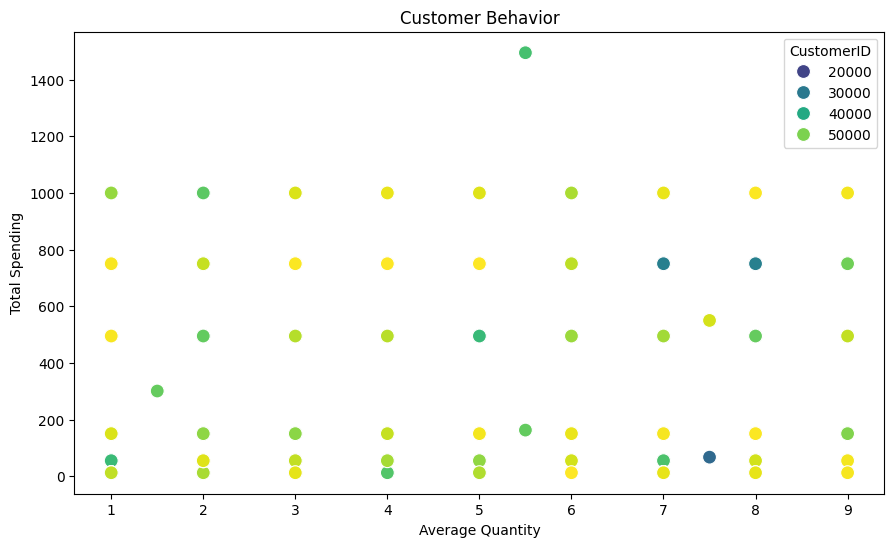

In [20]:
# Create a scatter plot with a table using Seaborn and Matplotlib
plt.figure(figsize=(12, 6))

# Scatter plot
sns.scatterplot(x='Quantity', y='Price', data=customer_behavior, hue='CustomerID', palette='viridis', s=100)
plt.title('Customer Behavior')
plt.xlabel('Average Quantity')
plt.ylabel('Total Spending')

# Adjust layout
plt.subplots_adjust(right=0.8)

# Show the plot
plt.show()

In [25]:
from mlxtend.frequent_patterns import apriori, association_rules

# Group items by BillNo and create a list of items for each bill
basket = df.groupby('BillNo')['Itemname'].apply(list).reset_index()

# Encode items as binary variables using one-hot encoding
basket_encoded = basket['Itemname'].str.join('|').str.get_dummies('|')

# Find frequent itemsets using Apriori algorithm with lower support
frequent_itemsets = apriori(basket_encoded, min_support=0.01, use_colnames=True)

# Generate association rules with lower lift threshold
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)

# Display association rules
(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

rules.head(5)

C:\Users\prati\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(NESTLÉ KITKAT Rich Chocolate),(NESCAFÉ CLASSIC Black Roast),0.243108,0.147870,0.02005,0.082474,0.557749,-0.015898,0.928726,-0.511623
1,(NESCAFÉ CLASSIC Black Roast),(NESTLÉ KITKAT Rich Chocolate),0.147870,0.243108,0.02005,0.135593,0.557749,-0.015898,0.875620,-0.482003
2,(NESTLÉ MUNCH),(NESTLÉ EVERYDAY Ghee),0.197995,0.180451,0.02005,0.101266,0.561181,-0.015678,0.911892,-0.493671
3,(NESTLÉ EVERYDAY Ghee),(NESTLÉ MUNCH),0.180451,0.197995,0.02005,0.111111,0.561181,-0.015678,0.902256,-0.488263
